In [3]:
# 현재 디렉토리 확인
import os
print(os.getcwd())

# 라이브러리
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

# 부동소수점 표기 제거
pd.options.display.float_format = '{:.3f}'.format

# 모든 출력을 전부 보여주는 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# pyplot 한글 처리하는 코드
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,8)

# matplotlib 한글 처리
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

C:\DataScience\School_CCTV_Bigdata\Clustering\김은영


In [4]:
data=pd.read_csv('./Data/최종데이터/경감지표.csv', encoding='cp949', index_col=0)
data

,구,개최횟수,가해학생수,신체폭력,언어폭력,금품갈취,강요,따돌림,성폭력,사이버폭력,...,시설총합,cctv_총계,방범,어린이보호구역,공원놀이터,쓰레기무단투기,시설안전화재예방,교통단속,교통정보수집분석,기타다른법령
0,노원구,132,112,56,37,2,5,8,23,6,...,22,2282,1245,260,402,127,111,137,0,0
1,강서구,110,89,31,15,3,3,5,5,6,...,18,2437,1949,215,155,27,0,91,0,0
2,강남구,107,50,32,14,0,1,0,8,7,...,27,6645,4525,775,496,0,104,593,0,152
3,은평구,102,78,32,16,3,3,3,11,2,...,24,3660,2335,697,399,0,123,106,0,0
4,송파구,86,71,30,25,2,2,2,10,7,...,26,2743,1518,311,543,0,77,294,0,0
5,성북구,85,69,20,12,2,6,4,11,12,...,28,3754,2489,400,192,359,108,183,23,0
6,구로구,83,65,29,22,2,1,1,9,8,...,22,4075,2501,540,384,30,119,257,0,244
7,관악구,82,45,28,6,0,6,4,8,4,...,23,4909,3226,417,282,157,642,185,0,0
8,양천구,74,48,29,18,3,3,4,5,3,...,21,3307,2103,768,265,0,0,171,0,0
9,종로구,72,40,22,12,1,1,1,3,4,...,29,1729,1360,41,109,0,110,109,0,0


In [5]:
data=data[['시설총합','cctv_총계','학교폭력_예방교육_평균교육시간(1학급당)','내부상담_실시여부','외부상담_실시여부']]

In [6]:
data_x = data.iloc[:,[0,1,2,3,4]].values
m=data_x.shape[0] # 집합개수 25
n=data_x.shape[1] # 특징개수 3

## scatter plot
- '시설총합','cctv_총계','학교폭력_예방교육_평균교육시간(1학급당)','내부상담_실시여부','외부상담_실시여부' 

Text(0.5, 0, '시설총합(경찰서등)')

Text(0, 0.5, '학교폭력예방교육시간')

Text(0.5, 1.0, '지역구별')

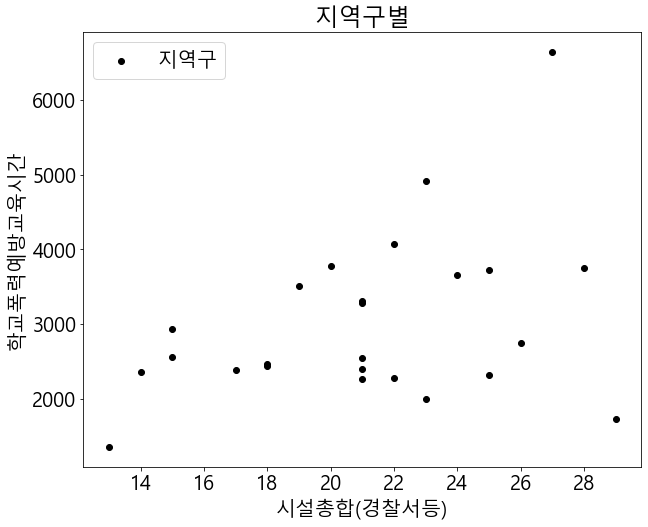

In [10]:
plt.scatter(data_x[:,0], data_x[:,1], c='black', label='지역구')
plt.xlabel('시설총합(경찰서등)') 
plt.ylabel('학교폭력예방교육시간')
plt.legend()
plt.title('지역구별')
plt.show()